In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load to Google Drive
!wget -O drive/MyDrive/download/gtex_v8.gct.gz  https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz
!wget --directory-prefix drive/MyDrive/download https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Stratify Balanced Training and Testing Sets in GTEx Gene Expression


In [ ]:
gtex_v8 = (pd.read_table(os.path.join('drive/MyDrive/download', 'gtex_v8.gct.gz'), sep='\t', skiprows=2, index_col=1)
        # .rename(columns={"Name": "gene_id"})
        # .set_index('gene_id')
        )

In [ ]:
import pickle

##To save in file
# with open('kos.txt','wb') as f:
#    pickle.dump(htg_gtex_intersect, f)

##To read it again from file
with open('kos.txt','rb') as f:
   htg_gtex_intersect = pickle.load(f)

In [ ]:
gtex_v8 = gtex_v8[gtex_v8['Name'].isin(list(htg_gtex_intersect))]

In [ ]:
gtex_v8.to_csv(os.path.join('drive/MyDrive/download', 'gtex_v8.tsv.gz'), sep='\t', compression='gzip', float_format='%.3g')

In [ ]:
gtex_v8

,Name,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Description,,,,,,,,,,,,,,,,,,,,,
DDX11L1,ENSG00000223972.5,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.00000,0.000,...,0.00000,0.03629,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
WASH7P,ENSG00000227232.5,8.76400,3.861,7.349,11.07000,3.306,5.3890,11.990,16.95000,10.040,...,1.60600,2.26800,5.38600,2.310,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
MIR6859-1,ENSG00000278267.1,0.00000,0.000,1.004,0.00000,0.000,0.0000,0.000,0.00000,0.000,...,0.00000,0.00000,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
MIR1302-2HG,ENSG00000243485.5,0.07187,0.000,0.000,0.06761,0.000,0.0000,0.000,0.00000,0.000,...,0.00000,0.00000,0.06073,0.000,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
FAM138A,ENSG00000237613.2,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.03904,0.000,...,0.02429,0.00000,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695.2,3799.00000,14750.000,6728.000,817.30000,7051.000,1857.0000,1041.000,1362.00000,1726.000,...,26170.00000,7690.00000,14080.00000,17230.000,18710.00000,4290.0000,2446.000,16250.00000,19660.00000,9803.00000
MT-TE,ENSG00000210194.1,16.24000,44.310,23.740,0.00000,2.252,3.7310,2.319,0.68970,2.703,...,105.20000,31.82000,48.78000,65.860,65.86000,15.3100,4.530,58.26000,59.07000,34.76000
MT-CYB,ENSG00000198727.2,6938.00000,26310.000,8455.000,8799.00000,29170.000,18180.0000,9593.000,7064.00000,19630.000,...,36570.00000,29300.00000,33570.00000,34040.000,31900.00000,20620.0000,16820.000,19200.00000,36670.00000,27740.00000


In [ ]:
gtex_v8 = (pd.read_table(os.path.join('drive/MyDrive/download', 'gtex_v8.tsv.gz'), sep='\t')
        .rename(columns={"Name": "gene_id"})
        .set_index('gene_id')
        .drop(['Description'], axis=1)
        .transpose()
        )

In [ ]:
gtex_v8

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.0000,0.00,0.00,0.0000,0.00,0.00,0.00,0.000,0.00,0.0000,...,0.0000,0.0363,0.0000,0.00,0.0000,0.000,0.00,0.0000,0.0197,0.0252
ENSG00000227232.5,8.7600,3.86,7.35,11.1000,3.31,5.39,12.00,16.900,10.00,12.5000,...,1.6100,2.2700,5.3900,2.31,2.4600,4.020,1.92,2.8600,0.8700,2.1700
ENSG00000278267.1,0.0000,0.00,1.00,0.0000,0.00,0.00,0.00,0.000,0.00,0.0000,...,0.0000,0.0000,0.0000,0.00,0.0000,0.000,0.00,0.0000,0.0000,0.0000
ENSG00000243485.5,0.0719,0.00,0.00,0.0676,0.00,0.00,0.00,0.000,0.00,0.0626,...,0.0000,0.0000,0.0607,0.00,0.0846,0.143,0.00,0.0522,0.0000,0.0000
ENSG00000237613.2,0.0000,0.00,0.00,0.0000,0.00,0.00,0.00,0.039,0.00,0.0000,...,0.0243,0.0000,0.0000,0.00,0.0000,0.000,0.00,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,3800.0000,14800.00,6730.00,817.0000,7050.00,1860.00,1040.00,1360.000,1730.00,3900.0000,...,26200.0000,7690.0000,14100.0000,17200.00,18700.0000,4290.000,2450.00,16200.0000,19700.0000,9800.0000
ENSG00000210194.1,16.2000,44.30,23.70,0.0000,2.25,3.73,2.32,0.690,2.70,10.2000,...,105.0000,31.8000,48.8000,65.90,65.9000,15.300,4.53,58.3000,59.1000,34.8000
ENSG00000198727.2,6940.0000,26300.00,8460.00,8800.0000,29200.00,18200.00,9590.00,7060.000,19600.00,9160.0000,...,36600.0000,29300.0000,33600.0000,34000.00,31900.0000,20600.000,16800.00,19200.0000,36700.0000,27700.0000


Intersection between tcga & gtex v8:
 genes = 563


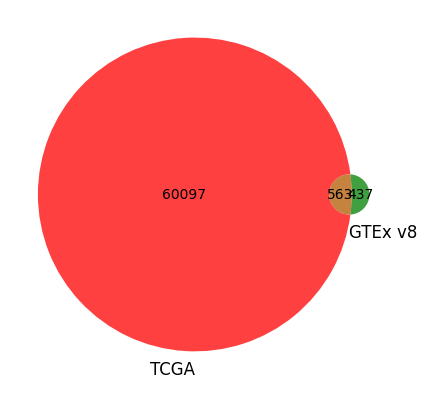

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

brain_data = pd.read_csv('/content/drive/MyDrive/data/tcga/brain/brain.tsv', sep="\t")

htg_gtex_intersect = (set(list(brain_data['gene_id'].values))).intersection(set(list(gtex_v8['Name'].values)))
print("Intersection between tcga & gtex v8:\n genes = {}".format(len(htg_gtex_intersect)))
venn2([set(list(brain_data['gene_id'].values)), set(list(gtex_v8['Name'].values))],
      set_labels = ('TCGA\n', 'GTEx v8\n'), alpha=0.75)
plt.show()

In [ ]:
gtex_v8 = (pd.read_table(os.path.join('drive/MyDrive/download', 'gtex_v8.gct.gz'), sep='\t', skiprows=2, index_col=1, nrows=500)
        .drop(['Name'], axis='columns')
        .transpose()
        .drop(drop_data)
        )
gtex_v8['SMTSD'] = pheno_df[['SAMPID', 'SMTSD']].set_index('SAMPID')

In [ ]:
strat = pheno_df.set_index('SAMPID').reindex(gtex_v8.index).SMTSD
tissuetype_count_df = (
    pd.DataFrame(strat.value_counts())
    .reset_index()
    .rename({'index': 'tissuetype', 'SMTSD': 'n ='}, axis='columns')
)

file = os.path.join('drive/MyDrive/download', 'gtex_sample_counts.tsv')
tissuetype_count_df.to_csv(file, sep='\t', index=False)

In [ ]:
train, temp = train_test_split(gtex_v8,
                               test_size=0.2,
                               stratify=strat,
                               random_state=123)

val, test = train_test_split(temp,
                              test_size=0.5,
                              stratify=strat.drop(train.index),
                              random_state=123)

print(train.shape, val.shape, test.shape)

(13880, 501) (1735, 501) (1735, 501)


In [ ]:
train.to_csv(os.path.join('drive/MyDrive/download', 'train_gtex.tsv.gz'), sep='\t', compression='gzip', float_format='%.3g')
val.to_csv(os.path.join(  'drive/MyDrive/download', 'validate_gtex.tsv.gz'), sep='\t', compression='gzip', float_format='%.3g')
test.to_csv(os.path.join( 'drive/MyDrive/download', 'test_gtex.tsv.gz'), sep='\t', compression='gzip', float_format='%.3g')